# Réseau d'accès radio TP
Lucas Hocquette - Quentin Goulas

# Exercice 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

2.1.3


In [31]:
# 1
def sample_users(K,R):
    v = np.random.uniform(low=0,high=R**2,size=K)
    theta = np.random.uniform(low=0,high=2*np.pi,size=K)
    r = np.sqrt(v)
    x,y = r*np.cos(theta), r*np.sin(theta)
    return x,y

In [32]:
# 2
r = 1
W = 3.84*10**6
theta = 0.4
sigma2 = 10**(-104/10)*1e-3
P = 10**(40/10)*1e-3

def measure_achievement_ratio(K,R,gamma,n_avg=1):
    x,y = sample_users(K,r)
    d = np.sqrt(x**2+y**2)
    L = -128.1 - 37.6*np.log10(d)
    l = 10**(L/10)
    history = np.zeros(n_avg)
    for i in range(n_avg):
        h = np.random.exponential(0.5,K)
        g = l*h
        p = P/K
        SINR = W/R*p*g/(theta*(K-1)*p*g+sigma2)
        history[i] = np.mean(SINR>=gamma)

    return history

print(f'The percentage of users for which the decoding condition is satisified is : {measure_achievement_ratio(20,32*1e3,10**(7/10))[0]*100}%')

The percentage for which the decoding condition is satisified is : 95.0%


In [16]:
# 3 and 4

achievement_ratio = measure_achievement_ratio(20,32*1e3,10**(7/10),100)
print(f'delta = {np.mean(achievement_ratio)*100}%')

delta = 97.85000000000001%


[1.         1.         1.         1.         0.998      0.99333333
 0.99714286 0.9975     0.99444444 0.991      0.99272727 0.9925
 0.98384615 0.98571429 0.98333333 0.986875   0.98705882 0.97722222
 0.98421053 0.983      0.9752381  0.97409091 0.96217391 0.97958333
 0.9704     0.97269231 0.96296296 0.97714286 0.96827586 0.95033333
 0.95903226 0.9465625  0.94909091 0.95558824 0.94514286 0.93972222
 0.93162162 0.95105263 0.91282051 0.9225     0.90243902 0.90619048
 0.89209302 0.87931818 0.90666667 0.8773913  0.84085106 0.90958333
 0.85       0.8296     0.82078431 0.79153846 0.7645283  0.74037037
 0.66745455 0.62785714 0.5945614  0.47896552 0.42932203 0.277
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        

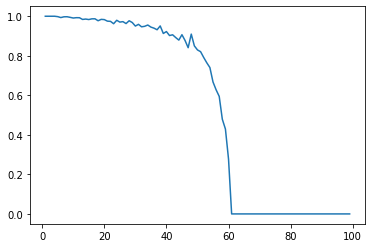

In [54]:
# 5

K_values = np.array(range(1,100))
deltas = np.zeros(len(K_values))

for i,K in enumerate(K_values) :
    ach_rat = measure_achievement_ratio(K,32*1e3,10**(7/10),100)
    deltas[i] = np.mean(ach_rat)

print(deltas)
print(f'The maximum number of users on the network is {K_values[np.sum(deltas>=0.9)]}')

plt.plot(K_values,deltas)
plt.show()

# Exercice 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
print(np.__version__)

1.22.4


$$ 
F = \begin{pmatrix} 
        0, \frac{g_2}{R_1g_1}, \cdots, \frac{g_k}{R_1g_1} \\
        \frac{g_1}{R_2g_2}, 0, \ddots, \vdots \\
        \vdots, \ddots, \ddots, \vdots \\
        \frac{g_1}{R_kg_k}, \cdots, \cdots, 0
    \end{pmatrix}       
$$

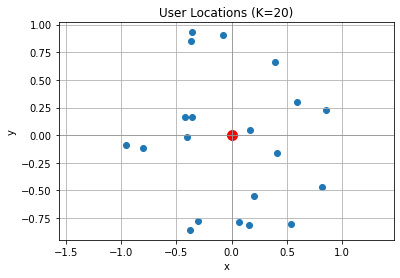

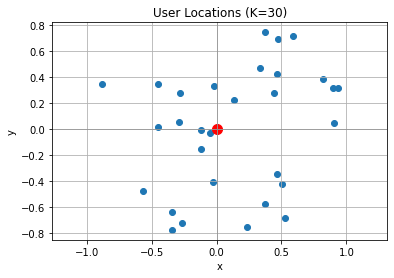

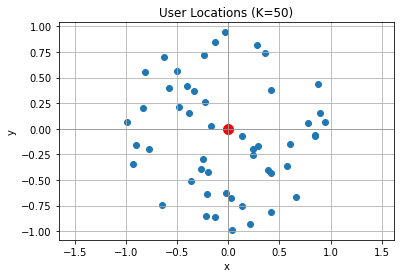

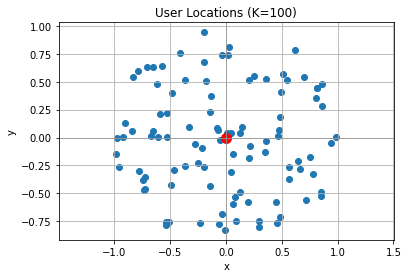

In [4]:
# 1.a

def sample_users(K,R):
    v = np.random.uniform(low=0,high=R**2,size=K)
    theta = np.random.uniform(low=0,high=2*np.pi,size=K)
    r = np.sqrt(v)
    x,y = r*np.cos(theta), r*np.sin(theta)
    return x,y

for K in [20,30,50,100]:
    # Example usage
    R = 1
    x, y = sample_users(K, R)

    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"User Locations (K={K})")
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.axis('equal')
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.scatter(0, 0, color='red', s=100)
    plt.show()

In [5]:
# 1.b
# K = np.array([20, 30, 50, 100],dtype=np.int32)
K = np.array(range(10,100,2), dtype=np.int32)
R = 1
r1,r2 = 15*1e3,32*1e3
W = 3.84*10**6
theta = 0.4
gamma1, gamma2  = 10**(5/10), 10**(7/10)
Rho = np.array([])

def generate_F(k,R,r1,r2,gamma1,gamma2,W,theta):
    x,y = sample_users(k,R)
    r = np.concatenate((r1*np.ones(k//2),r2*np.ones(k//2)))
    gamma = np.concatenate((gamma1*np.ones(k//2),gamma2*np.ones(k//2)))
    lamda = 0.5
    # h = np.random.exponential(1/lamda,k)
    h = np.ones(k)
    d = np.sqrt(x**2+y**2)
    L = -128.1 - 37.6*np.log10(d)
    l = 10**(L/10)
    g = l*h
    G1,G2 = np.meshgrid(gamma*r*g,g)
    F = (theta/W)*G1 / G2
    F[np.eye(k,dtype=bool)] = 0
    return F, r, gamma, g

for k in K:
    F,_,_,_ = generate_F(k,R,r1,r2,gamma1,gamma2,W,theta)
    rho = np.max(np.abs(np.linalg.eigvals(F)))
    Rho = np.append(Rho,rho)

Kmax = np.max(K[Rho<1])
print(Kmax)

92


In [6]:

#1.c
k = Kmax

x,y = sample_users(k,R)
r = np.concatenate((r1*np.ones(k//2),r2*np.ones(k//2)))
gamma = np.concatenate((gamma1*np.ones(k//2),gamma2*np.ones(k//2)))
lamda = 0.5
h = np.ones(k)
d = np.sqrt(x**2+y**2)
L = -128.1 - 37.6*np.log10(d)
l = 10**(L/10)
g = l*h
G1,G2 = np.meshgrid(gamma*r*g,g)
F = (theta/W)*G1 / G2
F[np.eye(k,dtype=bool)] = 0

sigma2 = 10**(-104/10)/1000
b = sigma2*(1/(3.84*10**6))*r*gamma/g
P =  np.linalg.inv(np.eye(k) - F)@b

print(10*np.log10(P*1000)) # display the power allocation in dBm

def SINR(W,R,P,G,theta,sigma2):
    alpha = W/R
    pg = P*G
    p,_ = np.meshgrid(P,P)
    p[np.eye(len(p),dtype=bool)] = 0
    sm = np.sum(p,axis=1)*g
    return alpha*pg/(theta*sm+sigma2)

[ 25.32590947  25.88319366   2.38203209  24.40107703  22.04469478
  25.9950416    8.41993778  26.66782373   4.96332626   1.58631281
  22.86112372  17.91337465  19.30757086  22.81699087  23.80963934
  18.90742273  21.86376544  25.40555337  18.09132604  16.49758562
  25.94156156  26.2477488   22.8994346   17.94125467  26.12631389
  23.91535137  10.54857397  26.45407652  17.30025146  25.22513514
  13.28264026  21.48029143  25.52560962   8.29670511  22.65782022
  12.56233777  24.76931946  26.49369362  16.05771782   3.66776272
   3.62608572  25.06968987  15.79117798  24.31640175  26.85461828
   9.58572256  13.71990494  16.93535024  19.0380341   23.60947945
  13.10419493  21.08473697  23.084477    16.56048259  17.49396291
  22.55117844   3.0857249   24.19191028   5.80205309  14.75252308
  23.16643023  21.49224636  26.42431343  18.41501748 -20.79905989
  15.302234    25.85711204  18.2174167   26.8020964   13.53715023
  24.22488964   8.74737348  19.67061028  25.02146402  22.31994813
  22.10691

k=10, num_iteration=1
k=12, num_iteration=1
k=14, num_iteration=3
k=16, num_iteration=3
k=18, num_iteration=4
k=20, num_iteration=3
k=22, num_iteration=4
k=24, num_iteration=5
k=26, num_iteration=4
k=28, num_iteration=5
k=30, num_iteration=4
k=32, num_iteration=4
k=34, num_iteration=4
k=36, num_iteration=5
k=38, num_iteration=5
k=40, num_iteration=10
k=42, num_iteration=5
k=44, num_iteration=5
k=46, num_iteration=10
k=48, num_iteration=10
k=50, num_iteration=13
k=52, num_iteration=13
k=54, num_iteration=8
k=56, num_iteration=14
k=58, num_iteration=10
k=60, num_iteration=6
k=62, num_iteration=19
k=64, num_iteration=6
k=66, num_iteration=17
k=68, num_iteration=10
k=70, num_iteration=15
k=72, num_iteration=17
k=74, num_iteration=19
k=76, num_iteration=14
k=78, num_iteration=34
k=80, num_iteration=11
k=82, num_iteration=36
k=84, num_iteration=37
k=86, num_iteration=131
k=88, num_iteration=21
k=90, num_iteration=73


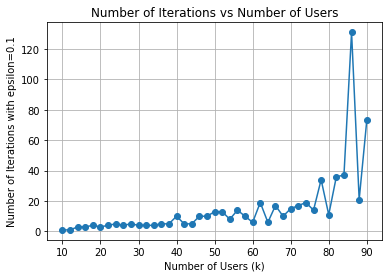

In [7]:
#1.d
K_list = np.array(range(10,Kmax,2), dtype=np.uint32)
epsilon = 0.1
iteration_list = np.zeros(len(K_list))

for idx in range(len(K_list)):
    k = K_list[idx]
    p = np.ones(k)
    new_p = np.ones(k)*0.1
    num_iteration = 0
    _, r, gamma, g = generate_F(k,R,r1,r2,gamma1,gamma2,W,theta)
    while not np.all(np.abs(p - new_p) < epsilon):
        p = new_p
        pg = p*g
        pg1,_ = np.meshgrid(pg,pg)
        pg1[np.eye(len(pg),dtype=bool)] = 0
        sm = np.sum(pg1,axis=1)
        new_p = (r*gamma*(theta*sm + sigma2))/(W*g)
        num_iteration += 1
    iteration_list[idx] = num_iteration
    print(f"k={k}, num_iteration={num_iteration}")

plt.plot(K_list, iteration_list, marker='o')
plt.xlabel('Number of Users (k)')
plt.ylabel(f'Number of Iterations with epsilon={epsilon}')
plt.title('Number of Iterations vs Number of Users')
plt.grid(True)
plt.show()
    

In [8]:
# 1.e

def iterativeE(gamma,beta,tol,seed):
    p=seed.copy()
    p_old = np.inf*np.ones_like(p)
    iter = 0
    while np.sum(abs(p-p_old))>=tol:
        p_old = p.copy()
        sinr = SINR(W,r,p,g,theta,sigma2)
        p = (1-beta)*p + beta*gamma/sinr*p
        iter +=1
    return p, iter

Beta = [0.1,0.3,0.5,0.8,1]
Niter = np.zeros_like(Beta)
_, r, gamma, g = generate_F(Kmax,R,r1,r2,gamma1,gamma2,W,theta)

seed = np.ones(Kmax)
for b in range(len(Beta)):
    p,iter = iterativeE(gamma,Beta[b],1e-3,seed)
    Niter[b] = iter

print(Niter)

[2735. 1111.  722.  483.  398.]


In [49]:
# 1.f

def iterativeF(gamma,alpha,tol,seed,maxIter):
    p = seed.copy()
    p_old = np.inf*np.ones_like(p)
    iter = 0
    while (np.sum(abs(p-p_old))>=tol) & (iter<maxIter):
        p_old = p.copy()
        sinr = SINR(W,r,p,g,theta,sigma2)
        p[sinr<gamma] = alpha*p_old[sinr<gamma]
        p[sinr>gamma] = p_old[sinr>gamma]/alpha
        iter +=1
    return p, iter

Alpha = 10**(np.linspace(0.25,1.5,7)/10)
Niter = np.zeros_like(Alpha)
_, r, gamma, g = generate_F(Kmax,R,r1,r2,gamma1,gamma2,W,theta)

seed = np.ones(Kmax)
for a in range(len(Alpha)):
    p,iter = iterativeF(gamma,Alpha[a],1e-3,seed,5e3)
    Niter[a] = iter

print(Niter)

[5000. 5000. 5000. 5000. 5000. 5000. 5000.]


KeyboardInterrupt: 

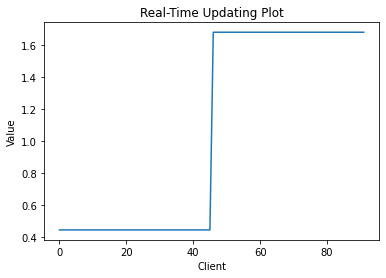

In [10]:
# 1.g

# plt.ion()  # Turn on interactive mode

fig, ax = plt.subplots()
ax.set_title('Real-Time Updating Plot')
ax.set_xlabel('Client')
ax.set_ylabel('Value')

# Initialize an empty list for the data
p_plot = []

# Plot the initial empty data
line, = ax.plot(p_plot)

# Display the plot
display(fig)

def update_plot(p):
    clear_output(wait=True)
    line.set_ydata(p)
    line.set_xdata(range(len(p)))
    ax.relim()
    ax.autoscale_view()
    display(fig)

def iterativeG(gamma,alpha,tol,maxIter):
    p = np.ones(Kmax)
    p_old = np.inf*np.ones_like(p)
    iter = 0
    while (np.sum(abs(p-p_old))/Kmax>=tol) & (iter<maxIter):
        p_old = np.copy(p)
        sinr = SINR(W,r,p,g,theta,sigma2)
        p[sinr > alpha*gamma*p_old] = p_old[sinr > alpha*gamma*p_old]/alpha
        p[sinr < gamma*alpha**(-1)] = p_old[sinr < gamma*alpha**(-1)]*alpha
        iter += 1
        if iter % 1 == 0:
            update_plot(p)
            print(np.sum(abs(p-p_old))/Kmax)
    return p, iter

Alpha = 10**(np.linspace(0.25,1.5,7)/10)
#Alpha = [10**(0.25/10), 10**(0.25/10), 10**(0.25/10)]
Niter = np.zeros_like(Alpha)
_, r, gamma, g = generate_F(Kmax,R,r1,r2,gamma1,gamma2,W,theta)
epsilon = 5e-3

for a in range(len(Alpha)):
    p_alpha,iter = iterativeG(gamma,Alpha[a],epsilon,5e3)
    Niter[a] = iter

print(Niter)

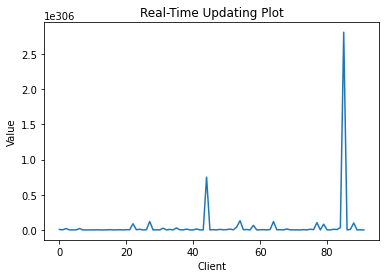

[419. 271. 227. 202. 187.] [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf nan inf inf inf inf
 inf inf]


C:\Users\lucas\AppData\Local\Temp/ipykernel_30568/279323681.py:30: RuntimeWarning: invalid value encountered in multiply
  p = (1-beta)*p + beta*gamma/sinr*p


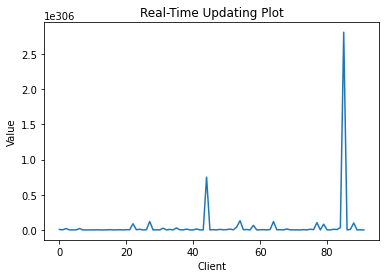

In [ ]:
# 2.a


def generate_F2(k,R,r1,r2,gamma1,gamma2,W,theta):
    x,y = sample_users(k,R)
    r = np.concatenate((r1*np.ones(k//2),r2*np.ones(k//2)))
    gamma = np.concatenate((gamma1*np.ones(k//2),gamma2*np.ones(k//2)))
    d = np.sqrt(x**2+y**2)
    L = -128.1 - 37.6*np.log10(d)
    l = 10**(L/10)
    return r, gamma, l

def iterativeE(gamma,beta,tol,seed,k,l):
    p=seed
    p_old = np.inf*np.ones_like(p)
    iter = 0
    lamda = 0.5
    while np.sum(abs(p-p_old))>=tol and iter <= 1000:

        # new h at each iteration
        h = np.random.exponential(1/lamda,k)
        # h = np.ones(k)
        g = l*h

        p_old = p.copy()
        sinr = SINR(W,r,p,g,theta,sigma2)
        p = (1-beta)*p + beta*gamma/sinr*p
        iter +=1
        if iter % 5 == 0:
            update_plot(p)
        
    return p, iter

fig, ax = plt.subplots()
ax.set_title('Real-Time Updating Plot')
ax.set_xlabel('Client')
ax.set_ylabel('Value')
p_plot = []
line, = ax.plot(p_plot)
display(fig)


Beta = [0.1,0.3,0.5,0.8,1]
Niter = np.zeros_like(Beta)
r, gamma, l = generate_F2(Kmax,R,r1,r2,gamma1,gamma2,W,theta)

seed = np.ones(Kmax)
for b in range(len(Beta)):
    p,iter = iterativeE(gamma,Beta[b],1e-3,seed,Kmax, l)
    Niter[b] = iter

print(Niter)

# Exercice 3

In [ ]:
# 1)

r = 1
W = 3.84*10**6
theta = 0.4
sigma2 = 10**(-104/10)*1e-3
P = 10**(40/10)*1e-3

def measure_achievement_ratio(K,R,gamma,n_avg=1):
    x,y = sample_users(K,r)
    d = np.sqrt(x**2+y**2)
    L = -128.1 - 37.6*np.log10(d)
    l = 10**(L/10)
    history = np.zeros((n_avg,1))
    for i in range(n_avg):
        h = np.random.exponential(0.5,K)
        g = l*h
        p = P/K
        SINR = W/R*p*g/(theta*(K-1)*p*g+sigma2)
        history[i] = np.mean(SINR>=gamma)

    return history

K_values = np.array(range(1,100))
deltas = np.zeros(len(K_values))

for i,K in enumerate(K_values) :
    ach_rat = measure_achievement_ratio(K,240*1e3,10**(10/10),100)
    deltas[i] = np.mean(ach_rat)

print(deltas)
print(f'The maximum number of users on the network is {K_values[np.sum(deltas>=0.9)]}')

In [32]:
# 2)

T = 1000
I = 50
gamma_i = 10**(10/10)
R_i = 240e3
L = 16                  # = W/R_i
P = 10**(40/10)*1e-3
K_list = [10, 20, 30]
radius = 1
lamda = 0.5
sigma2 = 10**(-104/10)*1e-3

for K in K_list:
    try_averages = np.zeros(I)
    for idx in range(I):
        # Generate K users
        x, y = sample_users(K, radius)
        # Compute distance and pathloss effect
        d = np.sqrt(x**2+y**2)
        L = -128.1 - 37.6*np.log10(d)
        l = 10**(L/10)
        Average_rates = np.zeros(K)

        for t in range(T):
            h = np.random.exponential(1/lamda,K)
            g = l*h
            SNR_base = P*g/sigma2
            SNR = SNR_base.copy()
            C = np.ones(K)
            current_rates = np.zeros(K)
            proportional_fairness = np.zeros(K)

            for i in range(K):
                while SNR[i] > gamma_i and C[i] < 15:
                    C[i] += 1
                    SNR[i] = SNR_base[i]/C[i]
                # print(f"SNR[i] = {SNR[i]} and gamm_i = {gamma_i}")

                current_rates[i] = C[i] * R_i
                if Average_rates[i] != 0:
                    proportional_fairness[i] = np.argmax(current_rates[i]/Average_rates[i])
                else:
                    proportional_fairness[i] = np.inf
            selected_user = np.argmax(proportional_fairness)
            Average_rates[selected_user] += -(1/(t+1))*Average_rates[selected_user] + current_rates[selected_user]/(t+1)
            Average_rates[range(K) != selected_user] -= Average_rates[range(K) != selected_user]/(t+1)
        try_averages[idx] = np.mean(Average_rates)
    print(f"K={K}, Average Rate={np.mean(try_averages):.2f}, Standard Deviation={np.std(try_averages):.2f}")

K=10, Average Rate=285022.08, Standard Deviation=58714.22
K=20, Average Rate=143004.24, Standard Deviation=30228.29
K=30, Average Rate=95574.72, Standard Deviation=18141.73
